<font color='DarkBlue' size=+2><b>Комментарий ревьюера</b></font><br>
<font color='DarkBlue'>Привет, Дарья! <br>Меня зовут Олег Мазуренко, и я буду проверять этот проект. Спасибо за проделанную работу! <br>Ко мне можно обращаться на «ты». Как мне обращаться, напиши.</font><br>
<font color='DarkBlue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font><br>
<font color='DarkBlue'>Синий текст &mdash; просто текст комментария.</font><br>
<font color='DarkGreen'>👌 Зеленый текст &mdash; все отлично.</font><br>
<font color='DarkMagenta'>👉 Фиолетовый текст &mdash; сделано все правильно, однако есть рекомендации, на что стоит обратить внимание. Реализованные рекомендации позволят нам наработать опыт решения задачи разными способами или посмотреть на задачу под иным углом.</font><br>
<font color='Red'>🛠 Красный текст &mdash; есть недочеты, они иногда бывают. </font><br><font color='DarkBlue'>Любая ошибка это возможность посмотреть на задачу с другой стороны и освоить новые знания, по этому не надо расстраиваться, если они есть.</font><br>
<font color='DarkBlue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты и сразу увидеть исправленное. <br>
Ответы на мои комментарии лучше тоже помечать. 
Например: </font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Теперь посмотрим, что у нас получилось!</b></font>

# Исследование компьютерных и консольных игр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников были собраны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель исследования** —  выявить определяющие успешность игры закономерности. Например, это может быть платформа или жанр. Это позволит сделать ставку на потенциально популярный продукт, спланировать рекламные кампании и создать модель машинного обучения, которая сможет предсказывать успешность новых игр.

**Ход исследования**

Перед началом исследования понадобится обзор данных, так как о их качестве ничего не известно.

Таким образом, исследование пройдёт в 7 этапов:

1. Обзор данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Общий вывод

**Описание данных**

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошее описание проекта. 👍</font>

## Обзор данных

In [5]:
#импорт библиотек для исследования

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
%matplotlib inline
import seaborn as sns

In [6]:
# отображение максимального количества колонок

pd.set_option('display.max_columns', None)

# функция для обзора данных

def data_review(csv):
    
    # чтение файлв и вывод первых 10 строк датафрейма
    try:
        data = pd.read_csv(csv)
    except:
        data = pd.read_csv(f'/datasets/{csv}')
    print('                                                  ПЕРВЫЕ 10 СТРОК ТАБЛИЦЫ')
    display(data.sample(10))
    
    print('')
    
    # вывод основной информации по датафрейму
    print('                                                  ОСНОВНАЯ ИНФОРМАЦИЯ')
    data.info()
    
    #проверка на явные дубликаты

    print('Количество явных дубликатов:', data.duplicated().sum()) 
    
    print('')
    
    # вывод описательной статистики   
    print('                                                  ОПИСАТЕЛЬНАЯ СТАТИСТИКА')   
    display(data.describe())

    print('')
    
    # вывод гистограмм по столбцам   
    print('                                                  ГИСТОГРАММЫ ПО СТОЛБЦАМ')                                                 
    data.hist(figsize=(15, 20));
    
    return data


# запуск функции
games = data_review(csv='games.csv')

# сохнанение количество строк оригинальной таблицы для сравнения после обработки
games_old_shape = games.shape[0]

                                                  ПЕРВЫЕ 10 СТРОК ТАБЛИЦЫ


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3718,Final Fantasy Explorers,3DS,2014.0,Role-Playing,0.16,0.07,0.28,0.02,69.0,7,E10+
933,Turok 2: Seeds of Evil,N64,1997.0,Platform,1.37,0.41,0.04,0.04,NaN,NaN,NaN
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
13982,NASCAR Heat Evolution,XOne,2016.0,Racing,0.03,0.00,0.00,0.00,NaN,1.6,E
3635,Catz,DS,2006.0,Simulation,0.49,0.02,0.00,0.04,NaN,5.3,E
12138,Ultimate Board Game Collection,PSP,2007.0,Misc,0.06,0.00,0.00,0.01,57.0,tbd,E
6543,"SpongeBob SquarePants: Lights, Camera, Pants!",XB,2005.0,Misc,0.19,0.06,0.00,0.01,NaN,NaN,NaN
9032,Class of Heroes,PSP,2008.0,Role-Playing,0.06,0.00,0.08,0.01,61.0,7.1,T
11558,Witches & Vampires: The Secrets of Ashburry,DS,2010.0,Adventure,0.05,0.02,0.00,0.01,NaN,NaN,NaN
2918,NHL 12,X360,2011.0,Sports,0.55,0.10,0.00,0.05,86.0,7,E10+



                                                  ОСНОВНАЯ ИНФОРМАЦИЯ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Количество явных дубликатов: 0

                                                  ОПИСАТЕЛЬНАЯ СТАТИСТИКА


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000



                                                  ГИСТОГРАММЫ ПО СТОЛБЦАМ


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Свои функции для выполнения повторяющихся операций - это короткий код и показатель профессионализма. Мы профи! 👍</font><br>
<font color='DarkGreen'>👌 Хорошо, что проверены дубликаты, некоторые студенты забывают это сделать. 😊</font>

На основе основной информации можно сделать выводы:
- колонки в названиях содержат прописные буквы, их нужно переназвать строчными для удобства восприятия и работы с ними
- в данных есть пропуски, так как количество значений отличается по столбцам
- тип данных в столбце `Year_of_Release` вместо `float` должен быть целочисленным, а в столбце `User_Score` нужно понять почему определяется как `object`
- яных дубликатов в таблице нет
- в таблице содержаться данные с 1980 по 2016г, больше всего игр вышло в 2010г
- есть сильные выбросы в продажах по всем регионам
- Оценки от критиков расположены в промежутке от 13 до 98, чаще всего игры были оценены в промежутке от 60 до 70

Значит в данных есть проблемы, их нужно найти и устранить, чтобы провети анализ.

### Вывод

Во время обзора данных были выявлены пропуски, столбцы с несоответствующим типом данных и аномалии, что может повлиять на результат исследования. Пока что можно утверждать, что данных достаточно для анализа, но требуется преобработка данных.

## Предобработка данных

### Переименование колонок

Колонки в названиях содержат прописные буквы, их нужно переназвать строчными для удобства восприятия и работы с ними

In [13]:
# замена названий колонок в датафрейме на строчные

games.columns = games.columns.str.lower()

# проверка, вывод рандомной строки

games.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
10778,Makai Shin Trillion,PSV,2014.0,Role-Playing,0.02,0.01,0.06,0.01,NaN,NaN,NaN


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец! 👍 Не которые пишут длинный словарь для замены колонок.</font>

### Удаление пропусков

In [16]:
#поиск пропуск и их суммирование по столбцам

games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски были в столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`.

- пропуски в `year_of_release` сложно заменить, так как даже игры, в которых указан год выпуска, например `Madden NFL 2004` в таблице указан как 2003. Я попробовала сгуппировать игры по названию и найти среднее отклонение года выпуска одной и той же игры на разные платформы, но они оказались больше, чем я думала. Возможно, они были бы меньше, если группировать только те игры, что имеют уже год в названии, но это показалось слишком дольше, чем я закладывала на обработку пропусков. Поэтому пропуски решено было удалить строки, тк их было `~2%`.
- 2 игры имеют пропуски в столбцах `name` и `genre`, их не получится восстановить и стоит просто удалить из таблицы
- `critic_score` и `user_score` имеют много пропусков, но если их заменить медианной по жанру, то это может не отражать действительную оценку игр и повлиять на статистику, так как график распределения меняется при замене. Поэтому решено было заменить `NaN`, но не на `0`, а на `-5`, так как `0` - это возможное число оценки, а `-5` уже ошибка, чтобы позднее перевести столбцы в `int`.
- пропуски в `rating` можно заменить на `no_rating`, так как ESRB - возрастной рейтинг для США и Канады. Пропуски могут означаеть то, что игра не выходила и не планировала на рынок Северной Америки.

Таким образом столбцы, `critic_score` и `user_score` можно будет использовать при анализе, если сделать фильтрацию по условию `> 0`.

In [18]:
# удаление из таблицы пропусков

games = games[~games['name'].isna()]
games = games[~games['year_of_release'].isna()]

# замена пропусков на unnamed

games['rating'] = games['rating'].fillna('no_rating')

# замена пропусков на -5

games['critic_score'] = games['critic_score'].fillna(-5)

# замена пропусков на -5

games['user_score'] = games['user_score'].fillna(-5)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что удалили пропуски в названии игр, тем более в этих строках еще хватает пропусков по другим колонкам.</font><br>
<font color='DarkMagenta'>👉 Правильно поставлена заглушка на пропуски в колонке рейтинга. А если посмотреть в интернете, что такое рейтинг ESRB, то мы узнаем, что это рейтинг для США и Канады. А значит пропуск не савязан с ошибкой заполнения данных, просто не только для Северной Америки выпускаются игры.</font><br>
<font color='DarkGreen'>👌 Хорошо, что заменили пропуски в колонках отзывов на заглушки. 👍 Главное потом не забывать их отфильтровывать при анализе.</font><br>
<font color='DarkMagenta'>👉 А зачем нам заглушка на значения года выпуска игр? Весь анализ строится на динамике по годам. Мы будем определять актуальный период, который и исследовать. Надо оценить % пропусков и принять правильное решение. Удалить напрочь.</font>

<font color='DarkBlue'><b>Комментарий ревьюера: Глоссарий</b></font><br>
<font color='DarkGreen'>👌 В контексте анализа и предобработки датасета часто используютется термин: <b>Заглушка</b>. <br>Из словаря: "Заглушка — приспособление для закрывания отверстия наглухо." <br>В нашем контексте закрытие пропуска в датасете каким-то значением, совпадающим по типу с данными колонки таблицы. Как правило, для числовых данных заглушка должна быть вне диапазона значений колонки. При анализе по данной колонке заглушка или фильтруется, или включается в анализ, если сам пропуск не является ошибкой сбора данных и несет какой-то признак. <br>Частая ошибка, когда заглушке присваивается числовое значение, например `0`, а в данных колонки присутствуют значения `'0'`, то при преобразовании к числовому типу произойдет слияние значимых данных таблицы и заглушки.</font>

<font color='Blue'><b>Комментарий студента</b></font><br>
👉 Добавила в описание столбца при описании пропусков и заменила на `no_rating`<br>
👉 Если оценить долю строк с пропусками в `year_of_release` = ~2%, поэтому удалить их, наверное, и правда хорошее решение. Спасибо.

### Изменение типов данных

In [23]:
# вывод типов данных по всем столбцам

games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Необходимо изменить тип данных в столбце `year_of_release`, `user_score` и `critic_score` на целочисленный для удобства в рассчетах.

В столбце `user_score` есть значение `tbd`, что означает, что игра в стадии получения оценки, но пока не оценена. Можно заменить их на `-10`, так же как и ранее пропуски.

In [25]:
# перевод float в int (отбрасывается дробная часть с округлением вниз)

games['year_of_release'] = games['year_of_release'].astype('int64')

# перевод float в int (отбрасывается дробная часть с округлением вниз)

games['critic_score'] = games['critic_score'].astype('int64')


# перевод object в float

games.loc[games['user_score'] == 'tbd', 'user_score'] = -10
games['user_score'] = games['user_score'].astype('float64')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что перевели типы данных. 👍</font>

### Добавление доп. столбцов

Необходимо добавить суммарные продажи во всех регионах в отдельный столбец для дальнейшего исследования.

In [29]:
# создание нового столбца с суммой продаж по всем регионам

games['sum_all_regions'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [30]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  sum_all_regions  16444 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB
None
-------------------------
name ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
name  : кол-во

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Мы забыли обработать значения 'tbd' в колонке 'user_score'.</font>

<font color='Blue'><b>Комментарий студента</b></font><br>
👉 Заменила на `-10`, чтобы при работе со столбцом он отбрасывался при фильтрации `> 0`

### Вывод

Пропуски были в столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`.

Возможные причины появления пропусков:

- человеческий фактор, пропуски в столбцах `name` и `genre`
- ошибка при выгрузке данных
- отсутствие реальных оценок, возможно вместо пропусков должно быть `tbd`
- игра не вышла, например, `G1 Jockey 4 2008` не имеет оценок, рейтинга и реальных продаж

При удалении пропусков было потерено `< 1%` данных. 

Изменены типы данных в `year_of_release`, `user_score` и `critic_score` на целочисленные. Стоит изменить тип заполнени и хранения данных на сервере, чтобы легче в дальнейшем работать с ними без преобработки.

Добавлен столбец `sum_all_regions` - это полезная информация, которая может считаться автоматический. Можно завести доп. столбец в базе данных для этого.

## Исследовательский анализ данных

### Сколько игр выпускалось по годам

Поиск данной информации позволит увидеть тендецию развития игровой индустрии, а также понять как те или иные мировые события могут повлиять на нее.

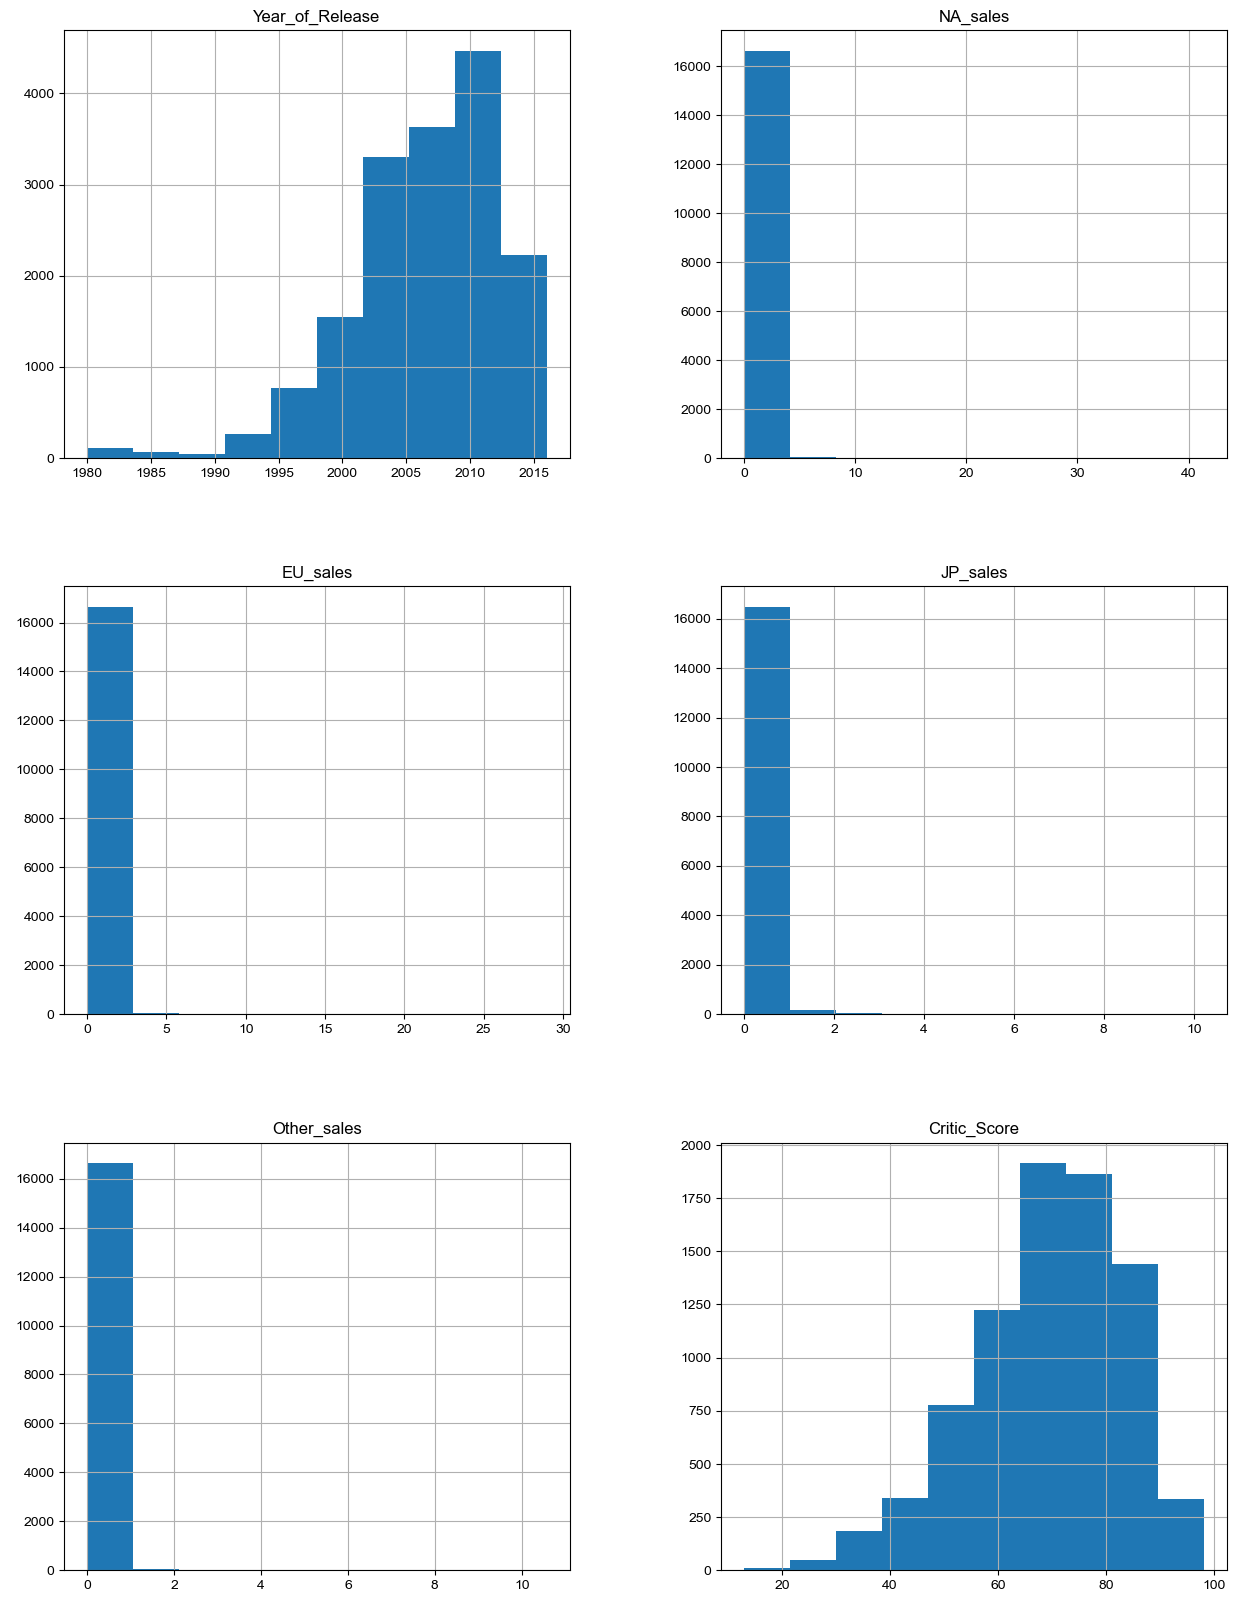

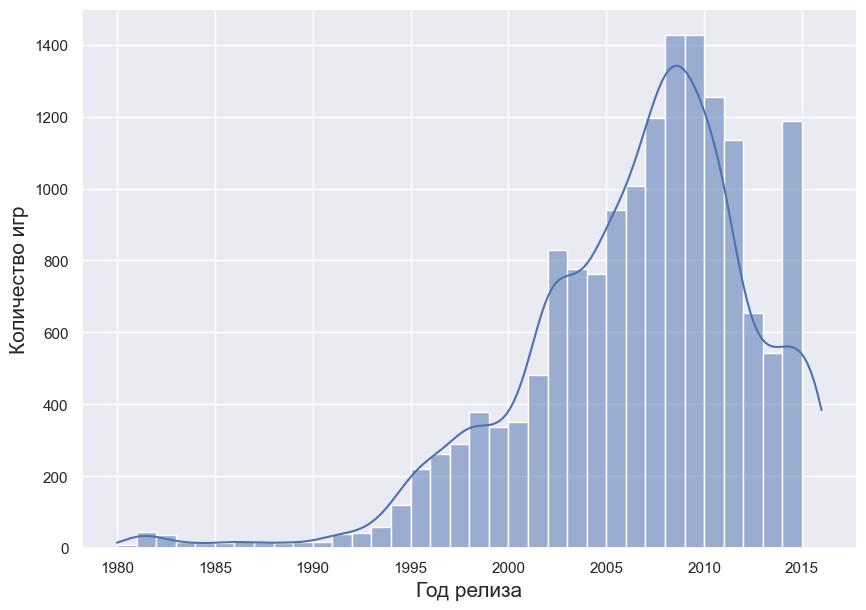

In [38]:
# построение графика выхода игр

sns.set(style="darkgrid")

plt.figure(figsize=(10, 7))
sns.histplot(data=games[games['year_of_release'] > 0], x='year_of_release', kde=True,  bins = range(1980,2016,1))
plt.xlabel('Год релиза', fontsize=15)
plt.ylabel('Количество игр', fontsize=15)
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация. 👍</font><br>
<font color='DarkMagenta'>👉 А вот названия графика  явно не хватает. Это относится и к некоторым другим графикам проекта.</font>

<font color='Blue'><b>Комментарий студента</b></font><br>
👉 Добавила везде👌

На графике видно, что пик игровой индустрии приходится на `2009 - 2010 годы`, когда выходила Mass Effect 2, BioShock 2 и Red Dead Redemption. Возможно это связано с тем, что начина с 20-х все больше людей могли позволить себе компьютер или консоль и помимо новых, появляются продолжения и перевыпуски игр, которые уже полюбились аудитории. 

После `2010 года` начинается спад, одной из причин которого могло быть то, что в `2011-2013 годах` на рынок выходили консоли восьмого поколения, что означало, что все игровые студии, кто работал над игрой или хотел выпустить ее в это время должны были построится под новый вид консолей. Рынок был перенасыщен играми и пользователи начали все больше и больше предъявлять запросы к производительности, графике и сюжету. Но не смотря на это в `2011 году` вышли Minecraft, Portal 2 и The Elder Scrolls V: Skyrim, являющиеся популярными и по сей день.

Рост выпускаемых игр в `2016 году` может быть связан с выпуском упрощенных правил добавления новых игр в популярном игровом сервисе Steam в `2015 году`, что приводит к индустрию к инди апокалипсису: количество продаваемых игр увеличивается в разы, ведь теперь выпустить игру могут не только AAA студии.

### Распределение по платформам с наибольшими суммарными продажами

Данная информации даст более детальную картинку развития игровой индустрии популярных платформ, а также позволить понять как выход нового поколения и спад интереса к старому повлиял на продажи игр.

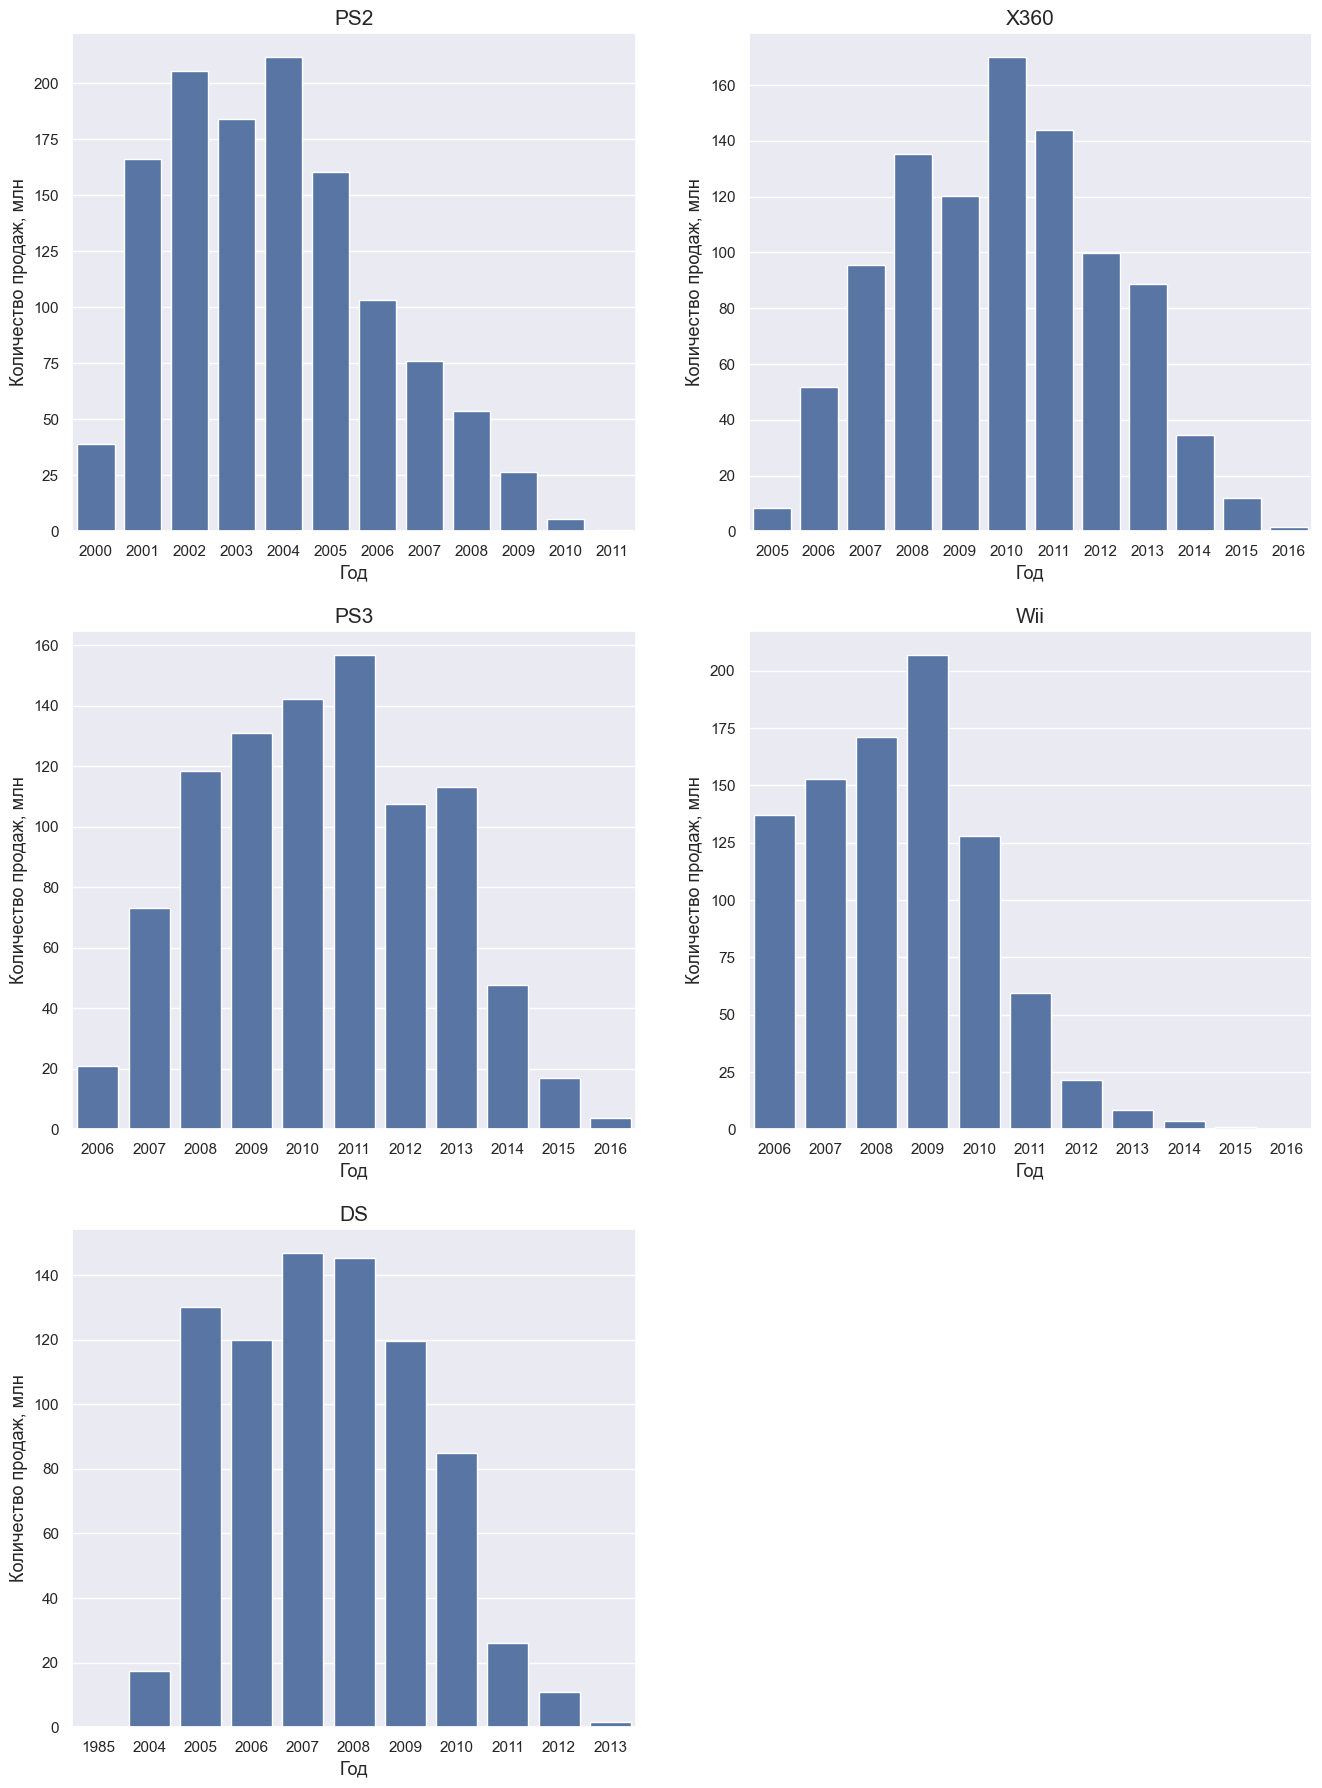

In [44]:
# поиск 5 платформ с наибольшими суммарными продажами

top_platform = games.groupby('platform', as_index=False)['sum_all_regions'] \
                                                  .sum() \
                                                  .sort_values(by='sum_all_regions',ascending=False) \
                                                  .head()

# построение графиков для топ-5 платформ с наибольшими суммарными продажами

def barplot_sales(row,col,data):
    value = 1 
    plt.figure(figsize=(16,22))
    for platform in data['platform'].unique():
        plt.subplot(row, col, value)
        sns.barplot(
            data = games.loc[(games['platform'] == platform) & \
                         (games['year_of_release'] > 0)].groupby('year_of_release', as_index=False)['sum_all_regions'].sum(), \
            x='year_of_release', \
            y='sum_all_regions')
        plt.title(platform, fontsize=15)
        plt.xlabel('Год', fontsize=13)
        plt.ylabel('Количество продаж, млн', fontsize=13)
        value += 1
    plt.show()
    
barplot_sales(row=3, col=2,data=top_platform)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Наверное, стоило попробовать разобраться с таким артефактом у платформы DS. Мы бы обнаружили, что это ошибка, так как в 1985 году этой платформы еще не существовало. Визуализация помогает не только определять закономерности, но еще и находить ошибки.</font>
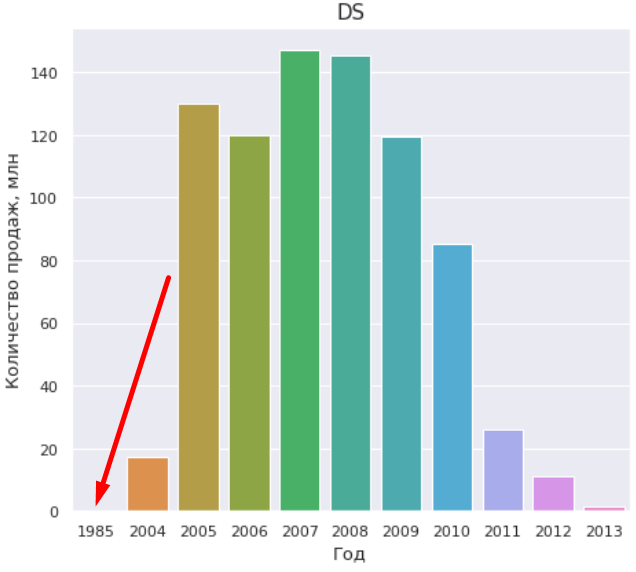

<font color='Blue'><b>Комментарий студента</b></font><br>
👉 Ниже описала ошибку и удалила строку из таблицы.

По графикам видно, что продажи на новых платформах имеют характерные черты: набор популярности в начале и спад после того как платформа устаревает. Так же видно то, что платформы в среднем живут `~10 лет` и `~5 лет` спустя 1-2 года после выхода имеют высокие продажи.

Стоит отметить, что у консолей могут быть эксклюзивные релизы игр и это может означать то, что продажи могли вырасти не из-за популярности платформы, а из-за выпущенной специальной игры на ней, что может повлиять на статистику.

**PlayStation**

Старт продаж игровой приставки `PS2` начался в `2000г` - эту информацию подтверждает график. В `2005г` PlayStation анонсировали выход новой консоли. Скорее всего это и повлияло на спад продаж, так как игры тоже переставали выпускаться и поддерживаться для старой версии консоли. Несмотря на это, консоль стала легендарной и практический не имела конкурентов в своем сегменте - это подтверждается количеством продаж и тем, что спустя 5 лет после анонса новой консоли PS2 все еще оставалась востребованной.

Игровая консоль `PS3` вышла в `2006г`, но несмотря на популярность предыдущего поколения, она также набирала популярность постепенно. Спад продаж был также обусловлен выходом нового поколения `PS4` в `2013г`, студии разработки получили доступ к консоли еще в 2012г.

**Xbox**

Старт продаж игровой приставки `Xbox 360` начался в `2005г` - эту информацию подтверждает график. По сравнению с конкурентами `PS3` от Sony и `Wii` от Nintendo консоль не была популярна вначале и спад продаж не был обусловлен выходом Xbox One (2013г). Скорее всего на спад продаж повлияла именно конкурентная среда, так как продажи на `PS3` были намного выше.

**Nintendo**

Игровая консоль `Wii` вышла в `2006г`, а в `2011г` было анонсировано следующее поколение Wii U. Большой рост `2009г` возможно обусловлен выходом популярной игры, например, про Mario.

В отличие от предыдущих платформ `DS` является карманной игровой консолью и была выпущена к концу `2004г`. Консоль сразу же стала успешной данный факт подтверждает и график продаж, но мне кажется, что консоли Nintendo очень сложно сравнивать с другими платформами за счет специфики япоского рынка и уникальных игры выходящих специально для Nintendo. В `2011г` - Nintendo 3DS. Также как и другие платформы продажи пошли на спад с выходом нового поколения, хотя до этого и выходили новые весрии платформы в 2006г и 2008г.

На графике с DS отображается 1985г - нужно удалить эту строку, тк консоль вышла только в 2004г, а восстоновить реальное значение выхода игры не удалось.

In [48]:
games = games[games['name'] != 'Strongest Tokyo University Shogi DS']

### Посик потенциально прибыльных платформ на 2017г

<font color='DarkBlue'><b>Комментарий ревьюера</b></font> <br>
<font color='Red'>🛠 Что у нас написано в задании: <br><b>Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.</b>. <br>
И далее мы должны делать исследование именно за актуальный период.</font>

<font color='Blue'><b>Комментарий студента</b></font><br>
Ниже описала.

Выше по графикам по годам мы обнаружели, что игровая индустрия быстро меняется и игровые платформы в виде консолей в среднем живут `~10 лет` и `~5 лет` спустя `1-2 года` после выхода имеют высокие продажи. Поэтому, чтобы найти потенциально прибыльную я решила взять данные за 2017г - 5 лет - 2 года = c 2010г по 2016г (актуальный период).

Нас интересуют платформы, которые были выпущены в 2010-2015 год, так как пользователи уже успели на них перейти, а студии уже перестроится под выпуск игр для нового поколения.

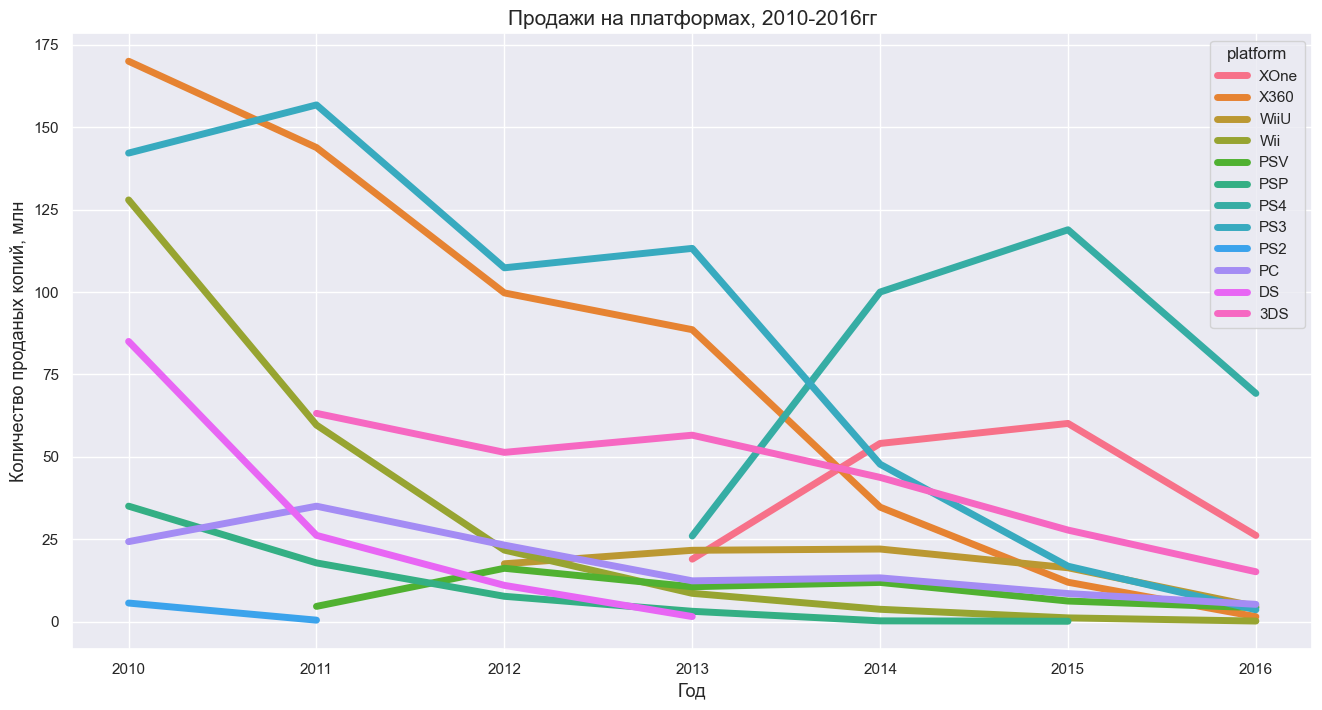

In [53]:
# создание датафрейма с платформами, которые имели продажи начиная с 2010г

potential_platform = games[games['year_of_release'] >= 2010].groupby(['platform','year_of_release'], as_index=False) \
                                                        ['sum_all_regions'].sum() \
                                                        .sort_values(by='platform',ascending=False)

# график рентабельности платформ с 2010-2016гг
plt.figure(figsize=(16,8))
sns.lineplot(data=potential_platform, \
            x = 'year_of_release', \
            y = 'sum_all_regions', \
            hue='platform', errorbar=None, linewidth=5)
plt.title('Продажи на платформах, 2010-2016гг', fontsize=15)
plt.xlabel('Год', fontsize=13)
plt.ylabel('Количество проданых копий, млн', fontsize=13)
plt.show()

По графикам видно, что `XboxOne` и `PS4` самые молодые и преспективные платформы. Во-первых, они представители нового поколения и пришли на замену PS3 и Xbox360. Во-вторых, они попадают в период предполагаемой прибыльности 5 лет спустя 1-2 года после релиза. `WiiU` не смотря на то, что подхдит под описание имеет явный спад продаж.

In [55]:
# Комментарий ревьюера
games.year_of_release.min()

1980

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 А почему мы строим диаграммы размаха с фильтрацией по платформам? В задании топ-платформы не требуются, предполагаются все. Мы таким образом теряем значимую информацию. И диаграммы размаха надо строить в двух видах, в полном, со всеми выбросами и масштабированном с крупными боксплотами, как сделано у нас.</font>

<font color='Blue'><b>Комментарий студента</b></font><br>
В Яндексе все задания написаны по порядку и не совсем понятно, что именно из этого является совместным, а что нет(\

Переделала и построила в 2-х вариантах, переписала выводы

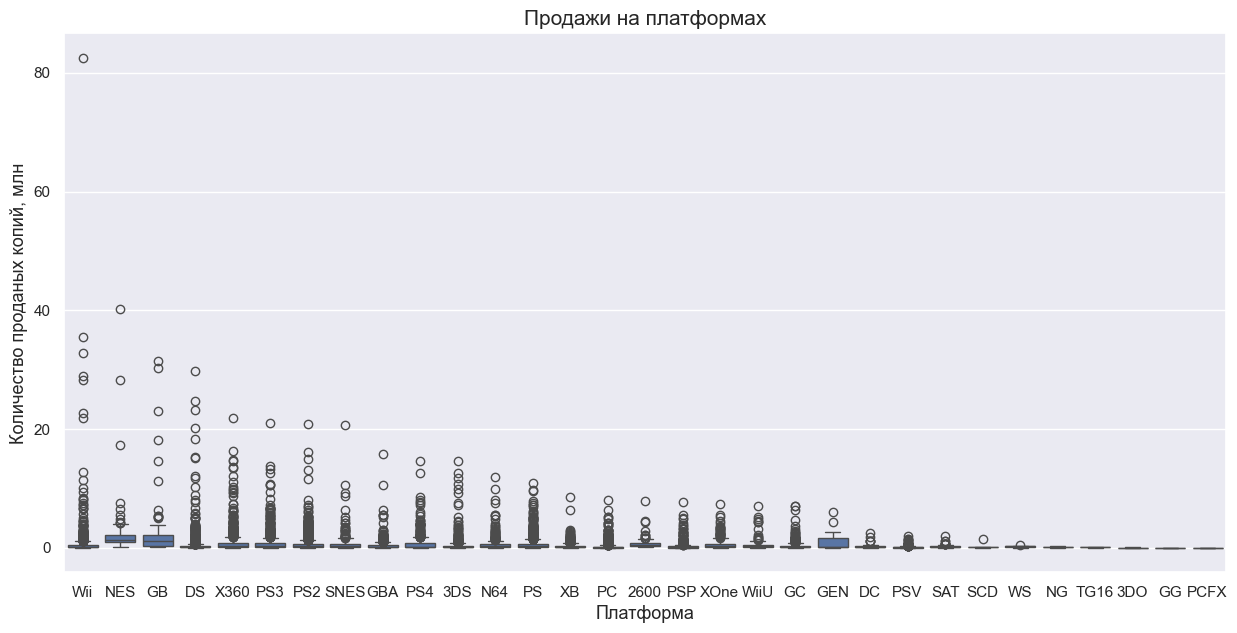

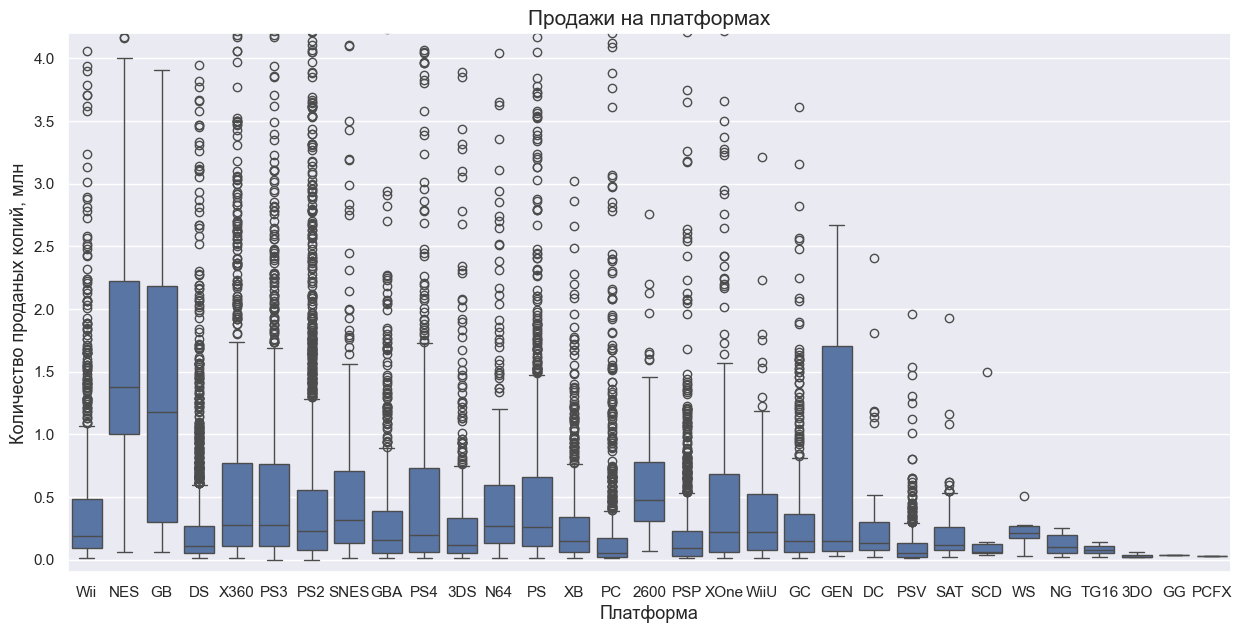

In [58]:
# построение boxplot для игровых платформ

plt.figure(figsize=(15,7))
sns.boxplot(data=games, \
           x='platform', \
           y='sum_all_regions')
plt.title('Продажи на платформах', fontsize=15)
plt.xlabel('Платформа', fontsize=13)
plt.ylabel('Количество проданых копий, млн', fontsize=13)
plt.show()


# построение увеличеного boxplot для игровых платформ
plt.figure(figsize=(15,7))
sns.boxplot(data=games, \
           x='platform', \
           y='sum_all_regions')
plt.ylim(-0.1,4.2)
plt.title('Продажи на платформах', fontsize=15)
plt.xlabel('Платформа', fontsize=13)
plt.ylabel('Количество проданых копий, млн', fontsize=13)
plt.show()

- `NES` и `GB` от Nintendo имеют самые высокие мединны по продажам, а значит игры выпускаеммые на них чаще всего были прибыльными. Вообще если смотреть на продажи на платформах от япоского производителя, то практический все они имели хорошие продажи
- минимальные продажи были у `GG`, `PCFX`, `TG16` и `3DO` - все консоли не принадлежат Sony, Microsoft или Nintendo, а возможно это как раз и стало причиной того, что продажи на них были хуже. Не все компании могут позволить себе разработку крутых процессоров, реализации крупных маркетинговых проектов по всему миру, а так же не стоит забывать о уже имеющайся фан-базе брендов-гигантов
- `Wii` имеет выброс, но при этом медиана продаж не такая большая, что значит, что хоть на платформе и выходила игра-хит, но люди не стали от этого больше покупать другие игры, а значит это не так важно для оценки прибыльности

### Взаимосвзясь отзывов и продажи

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Как-то мы оптом отфильтровываем заглушки. Если мы анализируем отзывы пользователей, то фильтруем заглушки по ним. Если анализируем отзывы критиков, то фильтруем эти заглушки. А вот удаление одновременно и тех и других ведет к необоснованному удалению данных и искажению расчета корреляции. См.код ниже.</font>

In [62]:
# Комментарий ревьюера
print(len(games.loc[(games['platform'] == 'PS2') & (games['user_score'] != 'tbd')]))
print(len(games.loc[(games['platform'] == 'PS2') & (games['critic_score'] > 0)]))
print(len(games.loc[(games['platform'] == 'PS2') & \
                            (games['critic_score'] > 0) & \
                            (games['user_score'] != 'tbd')].astype({'user_score' :'float64'})))

2127
1275
1275


<font color='Blue'><b>Комментарий студента</b></font><br>
Все верно, спасибо, что заметил. Сама запуталась в своих же заглушках. Так как поменяла `tbd` на `-10` и заменила сразу тип данных, то теперь фильтровать нужно только нужный столбец оценки  `> 0`.

Самой популярной платформой является `PS2`, на нее вышло 2161 игра и у нее самые большие продажи. Чем популярнее платформа, тем больше на ней игр, а чем больше на ней игр, тем больше у нее оценок. Возьмем для анализа 5 платформ с наибольшим количеством отзывов и построем для каждой диаграмму рассеивания.

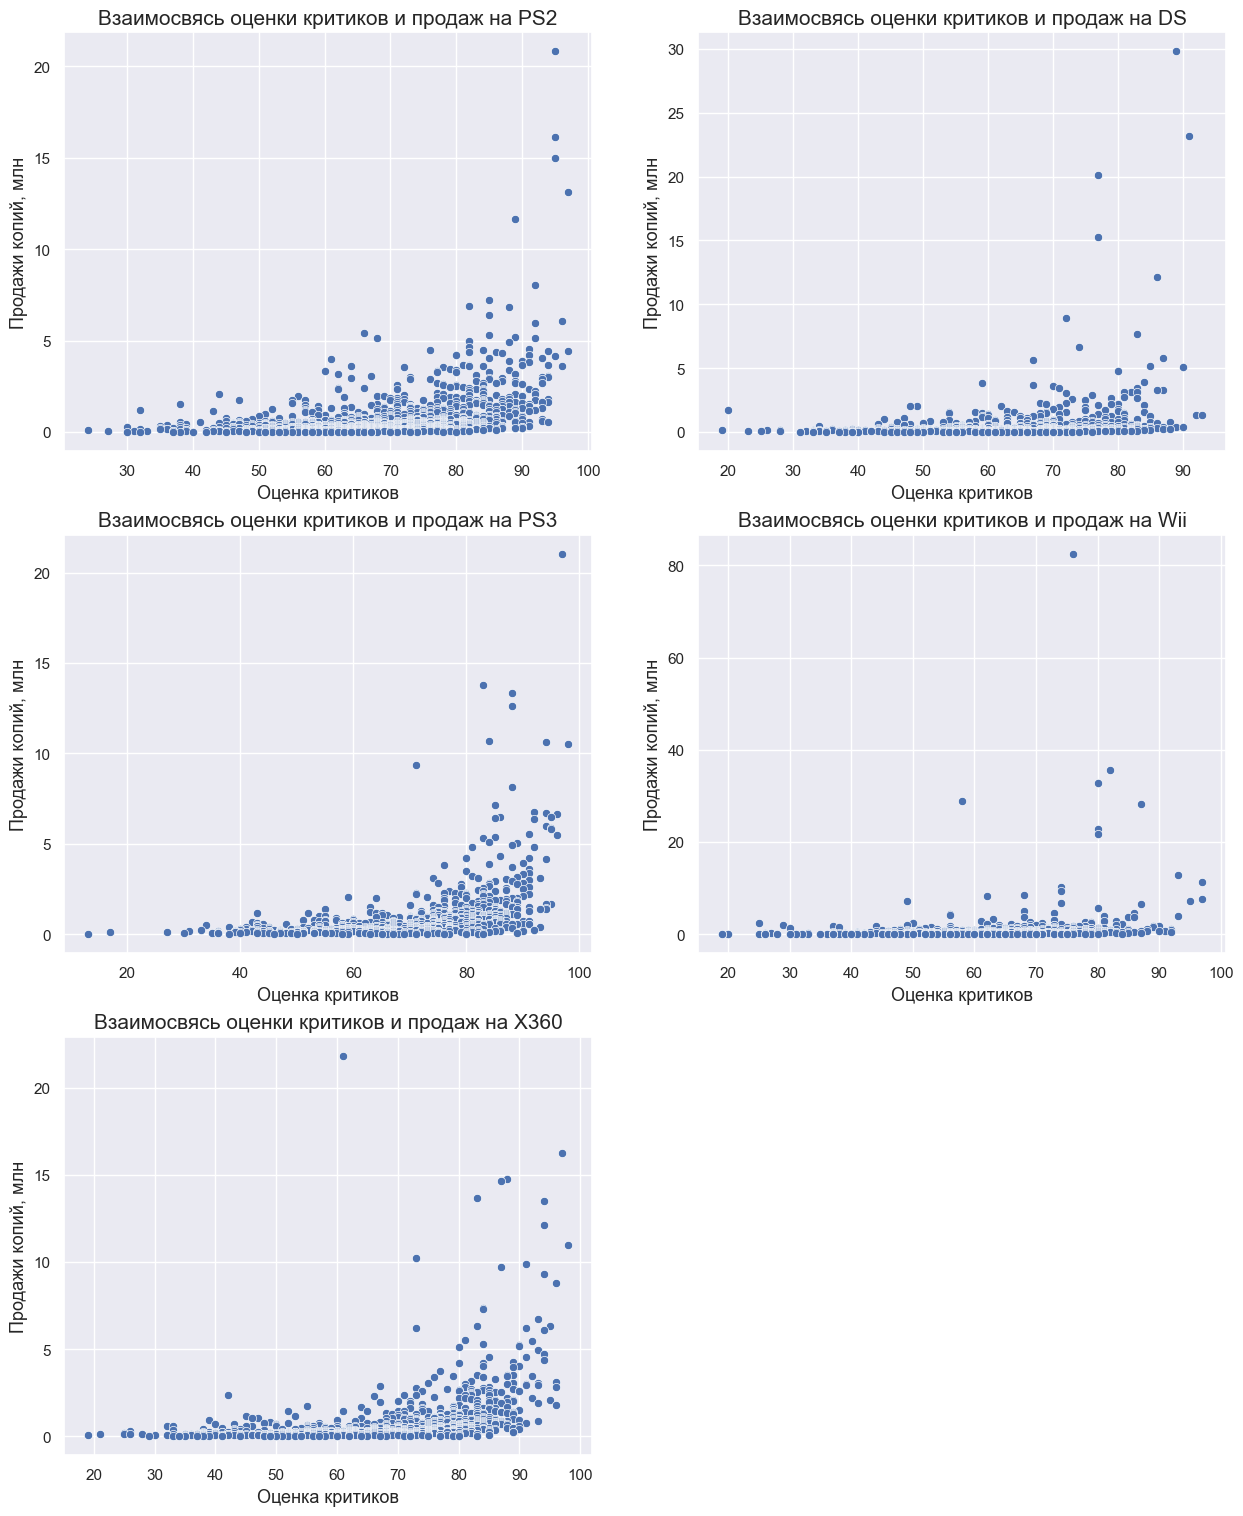

In [65]:
# поиск 5 платформ с наибольшими суммарными продажами

top_platform_score = games.groupby('platform', as_index=False) \
                          .agg({'name' : 'count', \
                                'critic_score' : 'count', \
                                'user_score' : 'count'}) \
                          .sort_values(by='critic_score', ascending=False) \
                          .head()

# построение диаграмм рассеивания для нахождения взаимосвзи между оценками игр и их продажамии

def scatterplot(row,col,data,data_col):
    value = 1 
    plt.figure(figsize=(15,25))
    for platform in data['platform'].unique():
        plt.subplot(row, col, value)
        sns.scatterplot(
            data = games.loc[(games['platform'] == platform) & \
                             (games[data_col] > 0)], \
            x=data_col, \
            y='sum_all_regions')
        plt.title(f'Взаимосвясь оценки критиков и продаж на {platform}' , fontsize=15)
        plt.xlabel('Оценка критиков', fontsize=13)
        plt.ylabel('Продажи копий, млн', fontsize=13)
        value += 1
    plt.show()
    
scatterplot(row=4, col=2,data=top_platform_score,data_col='critic_score')

По диаграммам видна `слабая положительная взаимосвязь`: чем выше оценка, тем больше продаж. Что логично, ведь для этого и нужны оценки. Критики оценивают игры, а потенциальный покупатель принимает решение о покупке той или иной игры на их основе. Чтобы лучше понять это стоит рассчитать корреляцию.

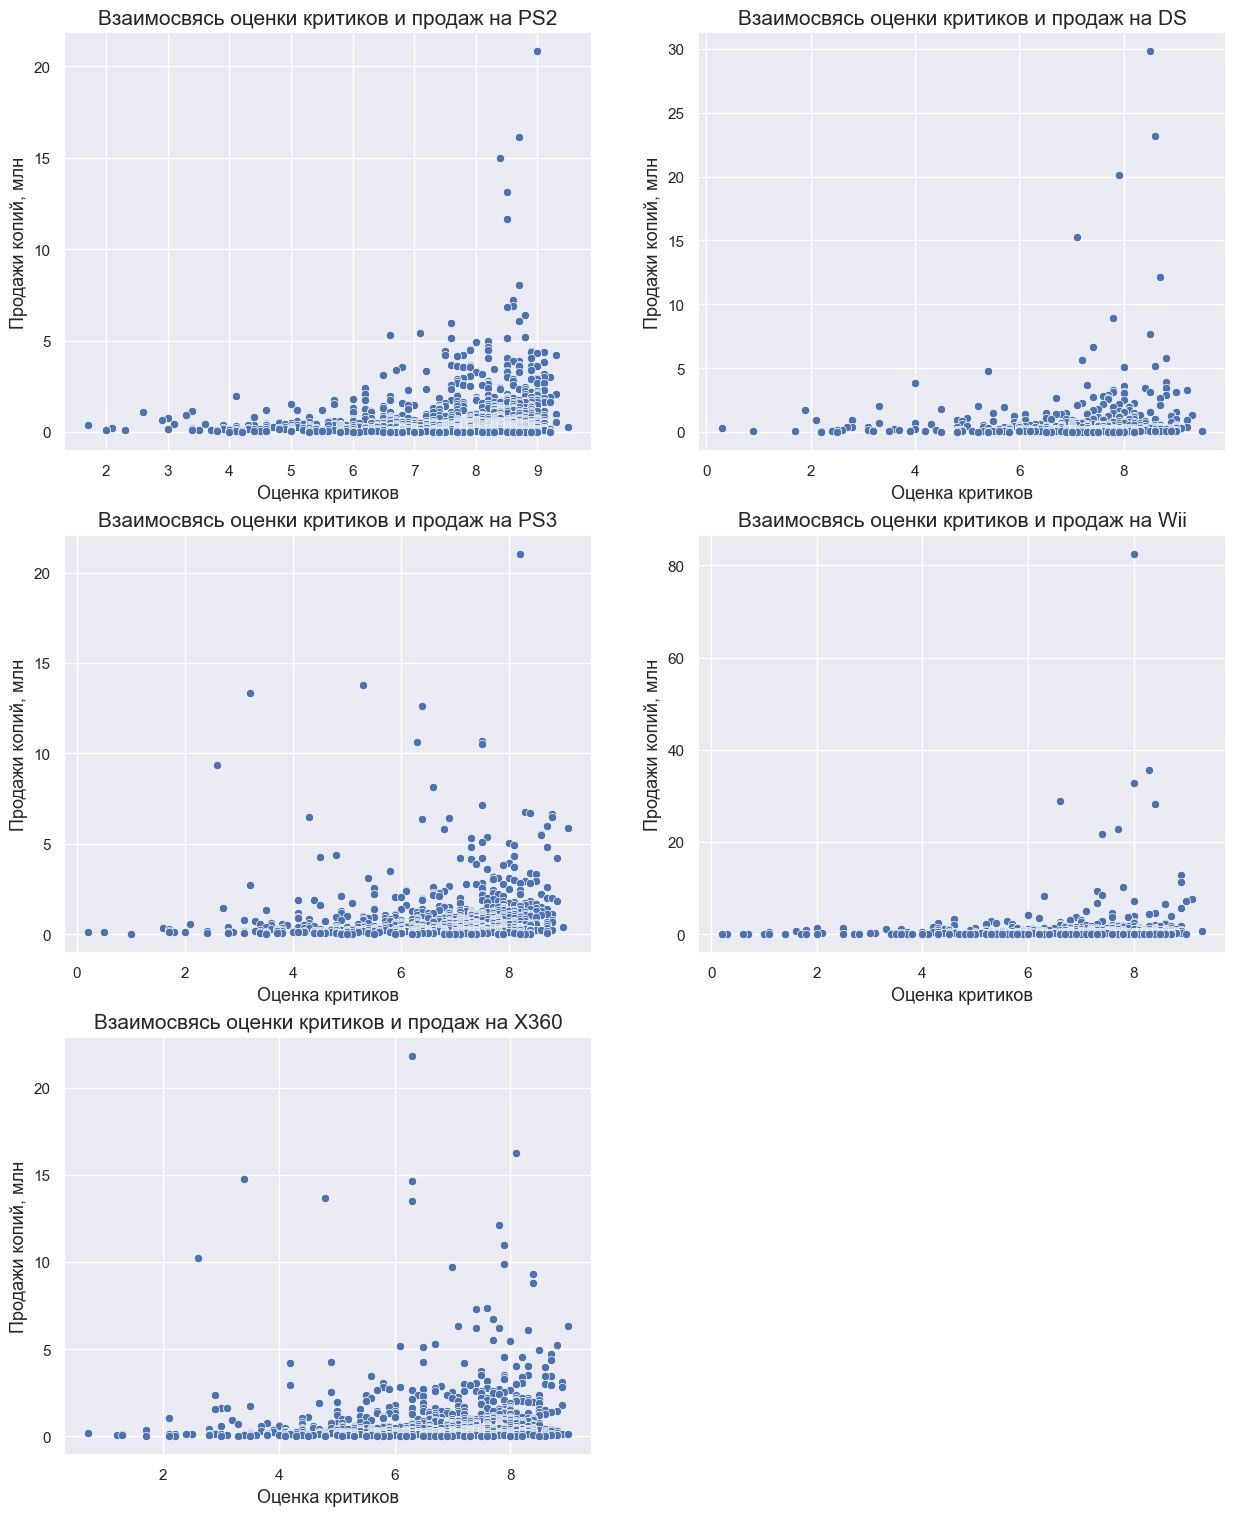

In [67]:
scatterplot(row=4, col=2,data=top_platform_score,data_col='user_score')

Распределение на диаграммах на основе оценок пользователей выглядит более хаотичной, но на платформе `PSP` между характеристикими вина более сильная взыимосвязь по сравнению с другими.

In [69]:
# построение таблиц корреляции для отфильтрованого датафрейма
for platform in top_platform_score['platform'].unique():
    print('                          ', platform)
    display(games.loc[(games['platform'] == platform) & \
                      (games['critic_score'] > 0) & \
                      (games['user_score'] > 0), ['critic_score', 'user_score', 'sum_all_regions']] \
                 .corr())
    print('----------------------------------------------------------')
    print()

                           PS2


,critic_score,user_score,sum_all_regions
critic_score,1.000000,0.565841,0.386415
user_score,0.565841,1.000000,0.171690
sum_all_regions,0.386415,0.171690,1.000000


----------------------------------------------------------

                           DS


,critic_score,user_score,sum_all_regions
critic_score,1.000000,0.653908,0.232258
user_score,0.653908,1.000000,0.139976
sum_all_regions,0.232258,0.139976,1.000000


----------------------------------------------------------

                           PS3


,critic_score,user_score,sum_all_regions
critic_score,1.000000,0.631154,0.428213
user_score,0.631154,1.000000,0.143978
sum_all_regions,0.428213,0.143978,1.000000


----------------------------------------------------------

                           Wii


,critic_score,user_score,sum_all_regions
critic_score,1.000000,0.688285,0.170855
user_score,0.688285,1.000000,0.110637
sum_all_regions,0.170855,0.110637,1.000000


----------------------------------------------------------

                           X360


,critic_score,user_score,sum_all_regions
critic_score,1.000000,0.62502,0.388992
user_score,0.625020,1.00000,0.110280
sum_all_regions,0.388992,0.11028,1.000000


----------------------------------------------------------



Корреляция между продажами и оценками есть, но она небольшая и вариируется от 0.1 - 0.4. В целом корреляция между продажами и оценками критиков больше, но не является основной движущей мотивацией при покупке игры.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠  А мы забыли отфильтровать заглушки в оценках пользователей.  И корреляцию считаем с заглушками.</font>
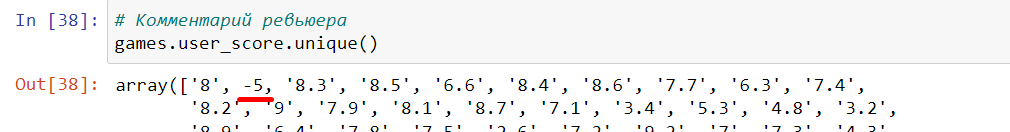

In [72]:
# Комментарий ревьюера
games.user_score.unique()

array([  8. ,  -5. ,   8.3,   8.5,   6.6,   8.4,   8.6,   7.7,   6.3,
         7.4,   8.2,   9. ,   7.9,   8.1,   8.7,   7.1,   3.4,   5.3,
         4.8,   3.2,   8.9,   6.4,   7.8,   7.5,   2.6,   7.2,   9.2,
         7. ,   7.3,   4.3,   7.6,   5.7,   5. ,   9.1,   6.5, -10. ,
         8.8,   6.9,   9.4,   6.8,   6.1,   6.7,   5.4,   4. ,   4.9,
         4.5,   9.3,   6.2,   4.2,   6. ,   3.7,   4.1,   5.8,   5.6,
         5.5,   4.4,   4.6,   5.9,   3.9,   3.1,   2.9,   5.2,   3.3,
         4.7,   5.1,   3.5,   2.5,   1.9,   3. ,   2.7,   2.2,   2. ,
         9.5,   2.1,   3.6,   2.8,   1.8,   3.8,   0. ,   1.6,   9.6,
         2.4,   1.7,   1.1,   0.3,   1.5,   0.7,   1.2,   2.3,   0.5,
         1.3,   0.2,   0.6,   1.4,   0.9,   1. ,   9.7])

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 В задании написано: <b>Соотнесите выводы с продажами игр на других платформах.</b> А мы сравнили только одну и по остальным суммарно посчитали корреляцию. Выводы, сделанные на основе диаграмм рассеяния и расчетов по нескольким платформам выглядят "весомей" и убедительней. Все платформы не надо, но хотя бы штук пять. Построение диаграмм рассеяния и расчет корреляции можно сделать циклом.</font>

<font color='Blue'><b>Комментарий студента</b></font><br>
Переделала все задание, ты прав. Я очень запуталась с формулировками и не совсем поняла, что от меня требуется. А после твоих комментариев все встало на свои места, спасибо)

### Взаимосвзясь жанров игр и продажи

In [76]:
# построение barplot по продажам среди жанров игр

plt.figure(figsize=(15,7))
sns.barplot(data = games, \
            x='genre', \
            y='sum_all_regions')
plt.xticks(rotation=45)
plt.title('Продажи игр по жанрам', fontsize=15)
plt.xlabel('Жанр игры', fontsize=13)
plt.ylabel('Продажи копий, млн', fontsize=13);

По графику видно, что самыми преспективными игровыми жанрами являются `шутеры` и `платформеры`, а игры в жанре `приключения` и `стратегия` имеют не так много продаж по сравнению с другими. Но стоит отметить, что рынок компьютерных игр уникален и вкусы игроков постоянно меняются.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что мы не попали в ловушку, что максимальные продажи являются самыми прибыльными. В данных продажи по жанру для разных платформ и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то мы все равно будем видеть максимум общих продаж, даже если остальные платформы по этому жанру были не удачны. Но для прибыльности нам нужны стабильные жанры, который приносит доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.  Было бы не плохо сравнение продаж проиллюстрировать диаграммой размаха. Сделаем? </font>

<font color='Blue'><b>Комментарий студента</b></font><br>
Сделаем👌 поняла, что ты имел ввиду, когда построила)

In [80]:
# построение boxplot по продажам среди жанров игр


plt.figure(figsize=(15,7))
sns.boxplot(data=games, \
           x='genre', \
           y='sum_all_regions')
plt.title('Продажи игр по жанрам', fontsize=15)
plt.xlabel('Жанр игры', fontsize=13)
plt.xticks(rotation=45)
plt.ylabel('Продажи копий, млн', fontsize=13);

plt.figure(figsize=(15,7))
sns.boxplot(data=games, \
           x='genre', \
           y='sum_all_regions')
plt.title('Выручка по дням', fontsize=15)
plt.xlabel('Жанр игры', fontsize=13)
plt.xticks(rotation=45)
plt.ylim(-0.1,2)
plt.ylabel('Продажи копий, млн', fontsize=13);

Диаграммой размаха меняет представление о популярности и прибыльности и лучше подходит для оценки. По ней видно, что самой стабильным жанром являются `платформеры`, так как медиана продаж и доверительный интервал у них больше, чем у других игр, а второе место также занимает `шутеры` по привлекательности, несмотря на большой выброс.

Самые не прибыльные игровые жанры: `приключения` и `головоломки`.

### Вывод

Игровая индустри очень сильно меняется каждое 5 летие с выпуском новго поколения консолей. Но меняется не только "железо", но и возможности студий, а также желания покупателей. Поэтому это всегда интересно следить за тем как те или иные факторы влияют на продажи игр.

- платформы имеют характерные черты: в среднем они существуют и поддерживаются `~10 лет`, большие продажи на них приходятся на `~5 лет` спустя `1-2 года` после релиза
- каждая платформа имеет свою истори и фан-базу за счет эксклюзивных игр и бренда производителя
- преспективно прибыльными платформами на `2017 год` являются  `XboxOne` и `PS4` - это доказывают актуальные данные собранные `c 2010 по 2016 год` 
- по сравнению с `PC` игровые консоли стоят гораздо дешевле и могут "тянуть" игры, которые не потянет компьютер за те же деньги. Поэтому продажи на платформе `PC` хоть и стабильны, но не такие же большие как на консолях
- между оценками и продажами игр есть `слабая положительная взаимосвязь`: чем выше оценка, тем больше продаж. Корреляция больше именно с оценкой критиков, чем с оценкой пользователей. Возможно это связано с доверием игроков больше к экспертному мнению
- преспективными игровыми жанрами являются `шутеры` и `платформеры`, а игры в жанре `приключения` и `головоломки` не такие прибыльные. Но стоит отметить, что рынок компьютерных игр уникален и вкусы игроков постоянно меняются.

## Портрет пользователя каждого региона

,platform,name,na_sales,eu_sales,jp_sales,sum_all_regions
16,PS2,2127,46.44,26.97,11.15,1233.56
4,DS,2120,47.38,23.47,21.80,802.76
17,PS3,1306,41.89,35.13,8.53,931.34
26,Wii,1286,54.63,28.99,7.66,891.18
28,X360,1232,61.98,27.91,1.28,961.24



                                                  ТОП-5 platform в регионах


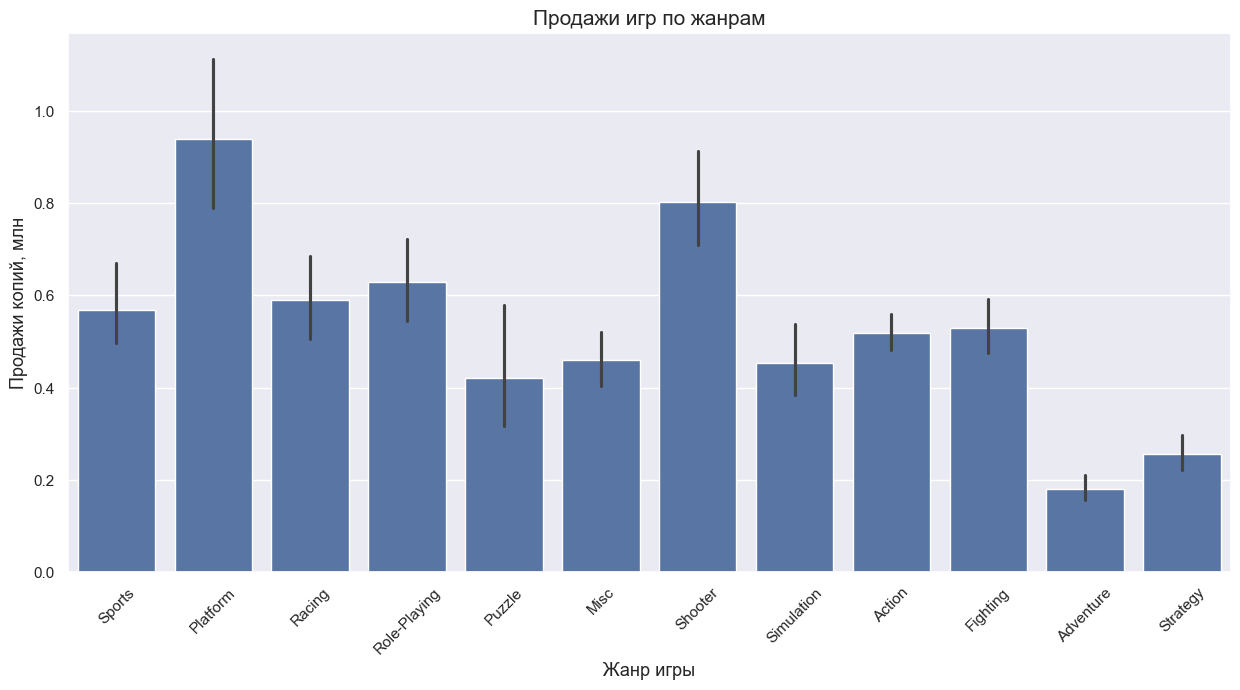

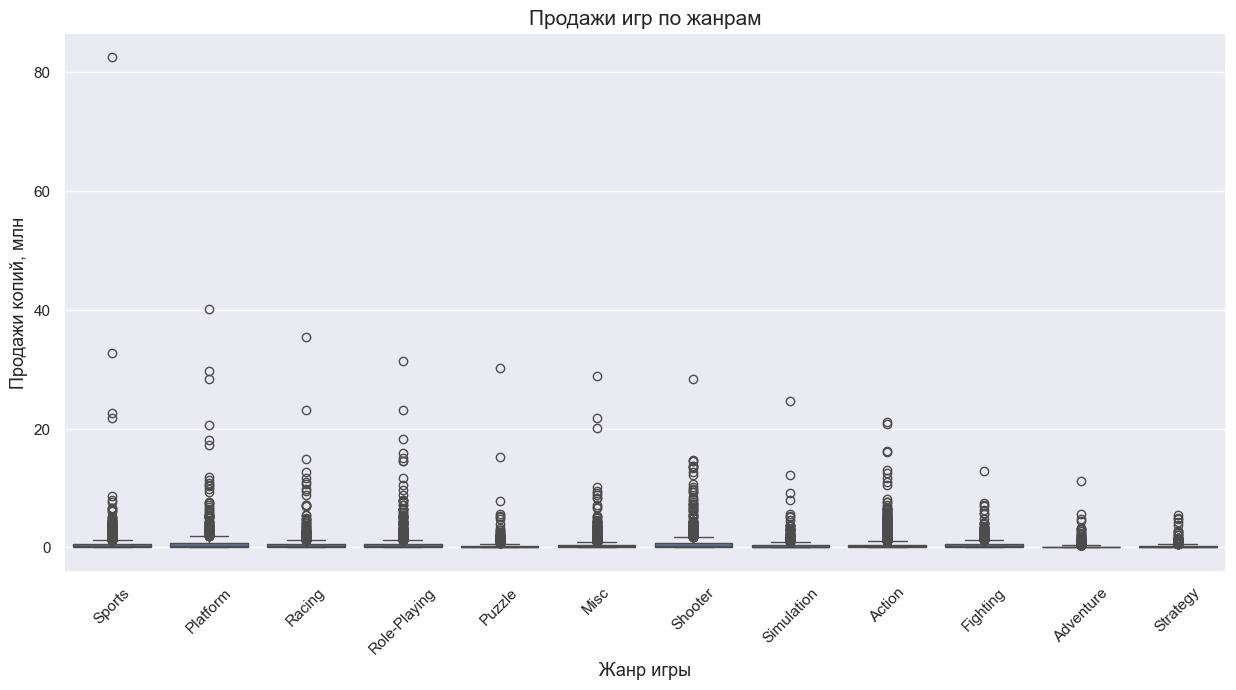

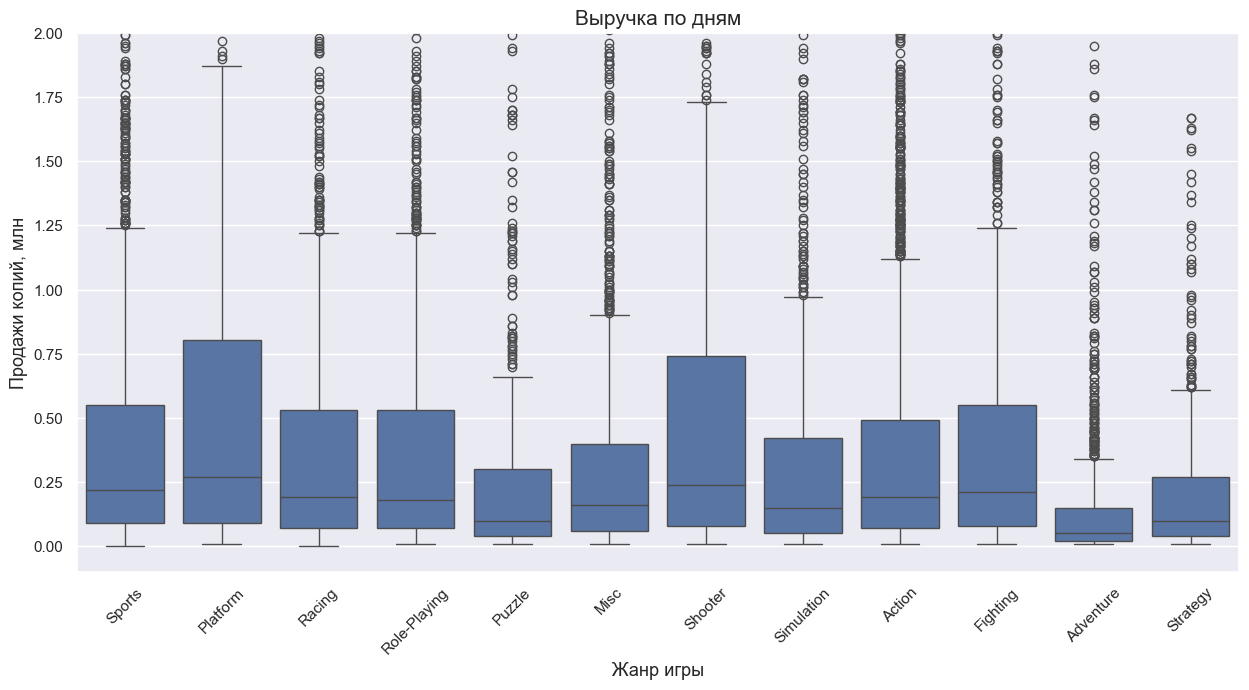

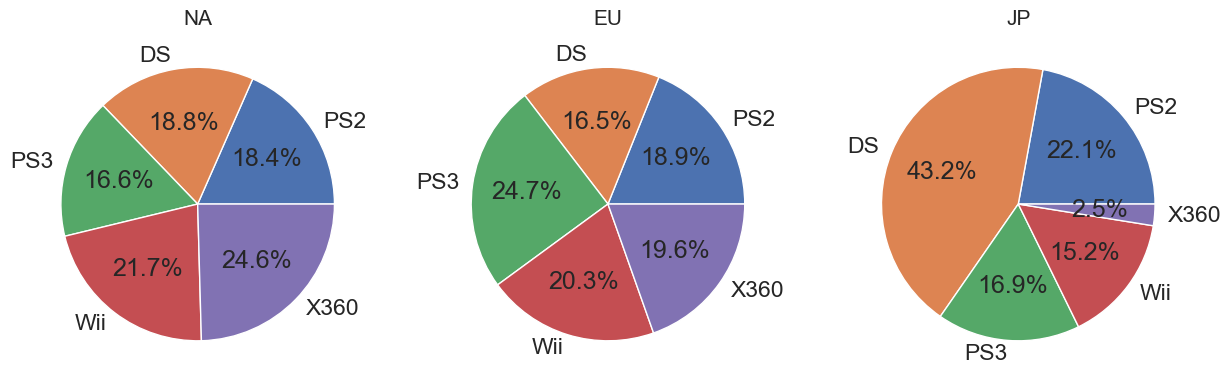

In [84]:
# функция создает датафрейм с топ-5 популярных игр на основе этого признака 
# и столбцами с суммарными продажами по каждому региону
# находит долю продаж по каждому региону на основе этого признака

def region_stat(value):
    data = games.groupby(value, as_index=False) \
                .agg({'name' : 'count', 'na_sales' : 'sum', 'eu_sales' : 'sum', 'jp_sales' : 'sum' , 'sum_all_regions' : 'sum'}) \
                .sort_values(by='name', ascending=False) \
                .head()
    data['na_sales'] =  round(data['na_sales'] / data['sum_all_regions'] * 100,2)
    data['eu_sales'] =  round(data['eu_sales'] / data['sum_all_regions'] * 100,2)
    data['jp_sales'] =  round(data['jp_sales'] / data['sum_all_regions'] * 100,2)
    display(data)
    print()
    print('                                                  ТОП-5', value, 'в регионах')
    
    #строим круговые диаграммы
    sns.set(font_scale=1.5)
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.pie(data['na_sales'], labels = data[value], autopct='%.1f%%')
    plt.title('NA', fontsize=15)
    plt.subplot(1,3,2)    
    plt.pie(data['eu_sales'], labels = data[value], autopct='%.1f%%')
    plt.title('EU', fontsize=15)
    plt.subplot(1,3,3)    
    plt.pie(data['jp_sales'], labels = data[value], autopct='%.1f%%')
    plt.title('JP', fontsize=15)
    plt.show()
    
# вызов функции
region_stat('platform')

- `PS2` и `PS3` популярны в Северной Америке и Европе, несмотря на япоские корни
- `X360` имеет высокие продажи игр в Северной Америке и совсем скудные в Японии, возможно это связано с тем, что это платформа от американского бренда стоит дороже, чем местные аналоги
- `DS` является самой популярной консолью от Nintendo и имеет самые высокие продажи в Японии

Если игра ориентирована на англоязычный рынок, то ей стоит в первую очередь обратить внимание на консоли от Sony и Microsoft. Если игра ориентирована на япоский рынок, то тогда хорошей платформой для нее будут местные производители, а также стоит обратить внимание на портативные устройства.

,genre,name,na_sales,eu_sales,jp_sales,sum_all_regions
0,Action,3306,50.29,29.77,9.33,1716.50
10,Sports,2306,51.25,28.35,10.30,1309.67
3,Misc,1721,50.56,26.65,13.54,790.29
7,Role-Playing,1481,35.45,20.22,37.95,931.08
8,Shooter,1296,56.16,30.20,3.71,1041.36



                                                  ТОП-5 genre в регионах


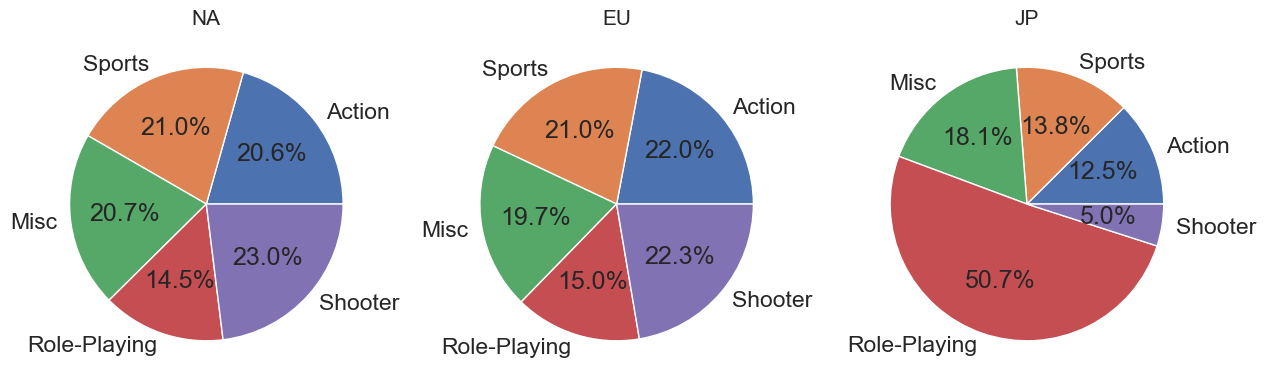

In [86]:
# вызов функции
region_stat('genre')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Любой анализ данных требует визуализации его результатов. Табличные данные не всегда информативны. У нас этого не сделано. Лучше сделать круговые диаграммы, а данные не вошедшие в ТОП просуммировать и вывести отдельной группой "Другие", и по платформам, и по жанрам. Тогда на такой диаграмме хорошо видны все региональные рынки игр с разбиением на платформы/жанры. Какая платформа/жанр занимает какую долю рынка. И наша визуализация несет определенную бизнес-логику, связанную именно с долями рынка занимаемыми платформами/жанрами. А этого не дают другие виды диаграмм. Примерно вот так:</font>
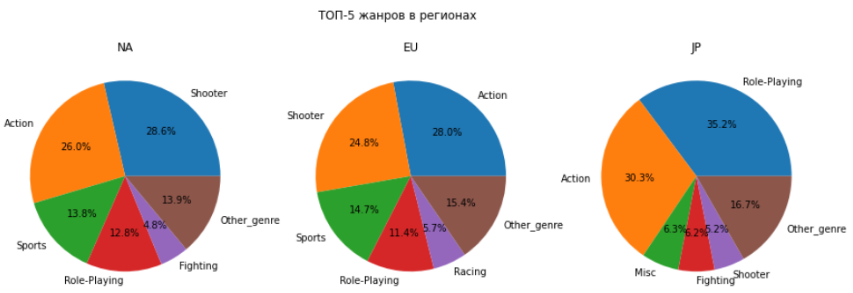

- больше всего продаж в жанре `спорт` и `шутер`, возможно это связано с тем, что действия в играх играют ключевую роль. Игроки получают удовольствие от своего превосходства, напрмиер, над мобами, другими игроками (противниками), а экшен дает развить навыки быстрой стрельбы или нажатия на клавиши от этого игры в этом жанре всегда будут популярны, как соревнования. Тоже самое можно сказать и про наличие игр в жанре `экшен`.
- японские игроки в отличии от американцев и европейцев имеют инные предпочтения. Это может быть связано не только с тем, что `ролевые игры` чаще выпускаются в Японии, но и с тем, что японцы имеют желание отыгрывать роли в виртуальном мире, так как они не всегда могут делать это в реальной за счет закрытой культуры страны.

,rating,name,na_sales,eu_sales,jp_sales,sum_all_regions
8,no_rating,6675,43.44,21.60,29.65,2822.08
1,E,3921,52.93,29.24,8.22,2407.61
7,T,2905,50.75,28.63,10.23,1473.08
5,M,1536,50.79,32.82,4.35,1462.53
2,E10+,1393,53.90,28.60,6.27,640.98



                                                  ТОП-5 rating в регионах


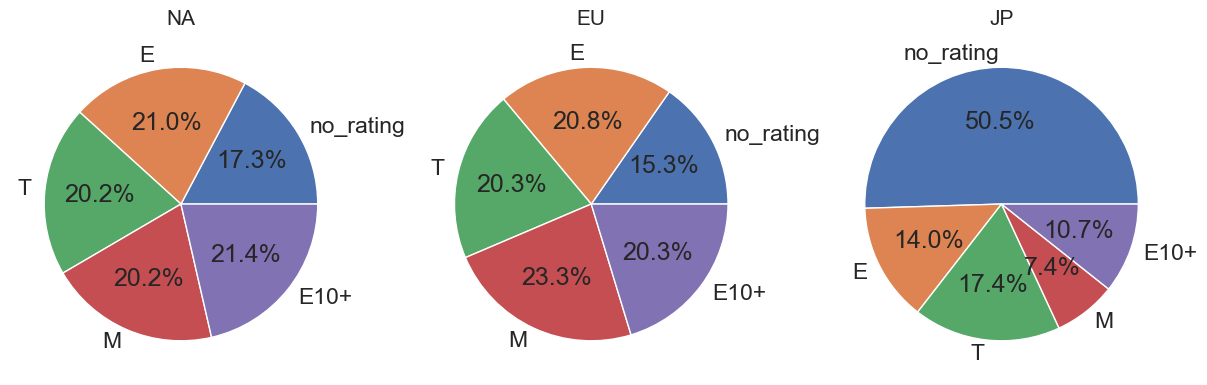

In [89]:
# вызов функции
region_stat('rating')

- диаграммы для NA и EU похожи, мы можем сделать вывод, что в Европе играют в схожие игры выпущеннные для США и Канады. Причем наличие того или иного рейтинга не имеет большого значения, так как показатели продаж под ними примерно схожи.
- в Японии больше всего продаж игр не выпускавшихся для США и Канады, возможно у них больше продаж приходится на игры от местных разработчиков нацеленных на местный рынок, но если судить по тому, что есть, то большая доля приходится на игры имеющие рейтинг для подростков.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Вот такая проблема была с рейтингом. <br>
А дело в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. А в Японии есть свой рейтинг, свой рейтинг есть в ЕС и отдельно в Германии, Австралии и т.д., но по ним у нас нет данных. То есть, в данном случае пропуск имеет признак, что игра выпущена не в Северо-Американском регионе. Необходимо шире смотреть на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. Мы должны это учитывать при предобработке данных. 👍</font>

<font color='Blue'><b>Комментарий студента</b></font><br>
Да, ошибка с рейтингом тянется от начала и до конца проекта... но я исправляюсь)

### Вывод

Продажи в регионах взаимосвязаны с платформой, жанром и возростным рейтенгом игры. Больше всего продаж приходится на Северную Америку, возможно это потому, что игровая индустрия там очень развита, много пользователей и люди часто покупают игровые консоли.

Портрет пользователя по регионам:

**Для северо-американского рынка:**
- платформа: бренд Microsoft
- жанр игры: Shooter
- возрастной рейтинг ESRB: не имеет значения

**Для европеского рынка:**
- платформа: бренд Sony
- жанр игры: Shooter
- возрастной рейтинг ESRB: не имеет значения

**Для японского рынка:**
- платформы: бренд Sony, особенно портативная консоль
- жанр игры: Role-Playing
- возрастной рейтинг ESRB: T (если есть)

Пишу бренд, так как консоли, например, PS3 и PS2 уже устарели.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC

Формирование гипотез:
- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются

Гипотезы взамоисключающие и позволяют понять есть ли разница между оценками пользователей на двух разных платформах. При том, что одна из них является персональным компьтором, который может быть использован в качесвте рабочего инструмента, а вторая - игрвой консолью Xbox, которая может использоваться в качесвте тв приставки.

Критерий значимости = `5%`, тк на практике чаще всего используется именно этот уровень статической значимость и проверка данных гипотез не требует более тчательной оценки в 1%, в отличии от применения т-теста в медицине.

In [97]:
print('Средняя оценка пользователей для игр на XOne', 
      round(games.loc[(games['platform'] == 'XOne') & (games['user_score'] > 0), 'user_score'].mean(),2))
print('Средняя оценка пользователей для игр на PC', 
      round(games.loc[(games['platform'] == 'PC') & (games['user_score'] > 0), 'user_score'].mean(),2))

Средняя оценка пользователей для игр на XOne 6.52
Средняя оценка пользователей для игр на PC 7.07


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [99]:
# проверка H0 гипотезы о равенстве средних двух независимых совокупностей
results = st.ttest_ind(games.loc[(games['platform'] == 'XOne') & (games['user_score'] > 0), 'user_score'], \
                       games.loc[(games['platform'] == 'PC') & (games['user_score'] > 0), 'user_score'], \
                       equal_var=False)

#критический уровень значимости
alpha = 0.05

print('p-значение:', f"{results.pvalue :.4f}%")
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0000%
Отвергаем нулевую гипотезу


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что отфильтровали заглушки.</font><br>
<font color='DarkGreen'>👌 Правильно, что для тестирования гипотез использован двусторонний t-тест Стьюдента.</font>

Результат теста значит то, что мы с 95% и даже большей судя по уровню p-value можем сказать, что `средние пользовательские рейтинги платформ Xbox One и PC не одинаковые`. Что может означать, что пользователи по-разному оценивают игры на платформах, но мы не можем утверждать, что именно платформа, например, имея лучше технические характеристики могла повлиять на это различие. Для этого нужно тчательнее изучить взаимосвязь данных характеристик.

### Средние пользовательские рейтинги жанров Action и Sports

Формирование гипотез:
- H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- H1: Средние пользовательские рейтинги жанров Action и Sports разные

Гипотезы взамоисключающие и позволяют понять есть ли разница между оценками пользователей между двумя разыми игровыми жанрами. Так как разница между ними более привлекательная в качестве дальшейго исследования и изучения, то она стала альтернативной гипотезой.

Критерий значимости = `5%`.

In [104]:
print('Средняя оценка пользователей для игр в жанре Action', 
      round(games.loc[(games['genre'] == 'Action') & (games['user_score'] > 0), 'user_score'].mean(),2))
print('Средняя оценка пользователей для игр в жанре Sports', 
      round(games.loc[(games['genre'] == 'Sports') & (games['user_score'] > 0), 'user_score'].mean(),2))

Средняя оценка пользователей для игр в жанре Action 7.06
Средняя оценка пользователей для игр в жанре Sports 6.95


In [105]:
# проверка H0 гипотезы о равенстве средних двух независимых совокупностей
results = st.ttest_ind(games.loc[(games['genre'] == 'Action') & (games['user_score'] > 0), 'user_score'], \
                       games.loc[(games['genre'] == 'Sports') & (games['user_score'] > 0), 'user_score'], \
                       equal_var=False)

#критический уровень значимости
alpha = 0.05

print('p-значение:', f"{results.pvalue :.4f}%")
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0737%
Не получилось отвергнуть нулевую гипотезу


Результат теста значит то, что мы не можем отвергнуть нулевую гипотезу. Что может означать, что пользовательские оценки игры не зависят от жанров.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Было бы правильным показать дополнительно средние пользовательские рейтинги и по платформам, и по жанрам, как иллюстрации не противоречивости наших гипотез.</font>

<font color='Blue'><b>Комментарий студента</b></font><br>
Да, ошибка с рейтингом тянется от начала и до конца проекта... но я исправляюсь)

### Вывод

- cредние пользовательские рейтинги платформ Xbox One и PC `не одинаковы` и мы уверены в этом на 99%. Что может означать, что пользователи по-разному оценивают игры на платформах, но мы не можем утверждать, что именно платформа, например, имея лучше технические характеристики могла повлиять на это различие. Для этого нужно тчательнее изучить взаимосвязь данных характеристик.
- мы не можем отвергнуть гипотезу о том, что cредние пользовательские рейтинги для жанров Action и Sports `одинаковые`. Что может означать, что пользовательские оценки игры не зависят от жанров.

## Общий вывод

Во время обзора данных были выявлены пропуски, столбцы с несоответствующим типом данных и аномалии. Чтобы избежать их были выявлены следующие пути решения:

- пропуски в `year_of_release` были удалены, так как восстановить их было невозможно. Тип данных был переведен из `float` в целочисленны.
- 2 игры имеют пропуски в столбцах `name` и `genre`, так как их не получится восстановить, то они были удалены из таблицы
- `critic_score` и `user_score` имеют много пропусков, но если их заменить медианной по жанру, то это может не отражать действительную оценку игр и повлиять на статистику, так как график распределения меняется при замене. Решено было заменить пропуски на заглушки в виде ошибочного значения `-5`.
- значения `tbd` в столбце `user_score` были заменены на заглушку `-10`, так как можно будет позднее посмотреть сколько игр находится в процессе оценки, но использовать эти данные как и пропуски для иной работы с оценками не получится.
- пропуски в столбце `rating` были заменены на `no_rating`.

Возможные причины появления пропусков:

- человеческий фактор, пропуски в столбцах `name` и `genre`
- ошибка при выгрузке данных
- отсутствие реальных оценок и рейтинка, возможно вместо пропусков должно быть `tbd`
- игра не вышла, например, `G1 Jockey 4 2008` не имеет оценок, рейтинга и реальных продаж

При удалении пропусков было потерено `< 2%` данных. 

Изменены типы данных в `year_of_release` и `critic_score` на целочисленные. Стоит изменить тип заполнени и хранения данных на сервере, чтобы легче в дальнейшем работать с ними без преобработки.

Добавлен столбец `sum_all_regions` - это полезная информация, которая может считаться автоматический. Можно завести доп. столбец в базе данных для этого.

--------------------------------------------------------------------------------

Игровая индустри очень сильно меняется каждое 5 летие с выпуском новго поколения консолей. Но меняется не только "железо", но и возможности студий, а также желания покупателей. Поэтому это всегда интересно следить за тем как те или иные факторы влияют на продажи игр.

**Полезные инсайты ч.1:**

- платформы имеют характерные черты: в среднем они существуют и поддерживаются `~10 лет`, большие продажи на них приходятся на `~5 лет` спустя `1-2 года` после релиза
- каждая платформа имеет свою истори и фан-базу за счет эксклюзивных игр и бренда производителя, топ 3 производителя Nintendo, Microsoft, Sony
- преспективно прибыльными платформами на `2017 год` являются  `XboxOne` и `PS4` - это доказывают данные собранные `c 2010 по 2016 год`, так как такого промежутка будет достаточно, чтобы игроки уже успели перейти на консоли нового поколения. 
- по сравнению с `PC` игровые консоли стоят гораздо дешевле и могут "тянуть" игры, которые не потянет компьютер за те же деньги. Поэтому продажи на платформе `PC` хоть и стабильны, но не такие же большие как на консолях
- между оценками и продажами игр есть `слабая положительная взаимосвязь`: чем выше оценка, тем больше продаж. Корреляция больше именно с оценкой критиков, чем с оценкой пользователей. Возможно это связано с доверием игроков больше к экспертному мнению
- преспективными игровыми жанрами являются `шутеры` и `платформеры`

------------------------------------------------------------

**Портрет пользователя по регионам:** 

Для северо-американского рынка:
- платформа: Xbox360
- жанр игры: Shooter
- возрастной рейтинг: E, E10

Для европеского рынка:
- платформа: бренд Sony
- жанр игры: Shooter
- возрастной рейтинг: M, E

Для японского рынка:
- платформы: бренд Nintendo
- жанр игры: Role-Playing
- возрастной рейтинг: T, E

Больше всего продаж приходится на Северную Америку, возможно это потому, что игровая индустрия там очень развита, много пользователей и люди часто покупают игровые консоли.

-------------------------------------------------------------

**Полезные инсайты ч.2:**

В ходе проверок гипотез было установлено то, что cредние пользовательские рейтинги платформ Xbox One и PC `не одинаковы`. Что может означать, что пользователи по-разному оценивают игры на разных платформах, но мы не можем утверждать, что именно платформа оказала влияние на оценку, например, имея лучше технические характеристики или наоборот, пользователи более предвзяты и ставлят выше или ниже оценки на опреденных платформах. Для этого нужно дополнительное исследования взаимосвязи и проверить все имеющиеся платформ попарно сравнивая их с друг другом, чтобы понять это общая или частная тенденция оценки.

---------------------------------------------------------------

**Рекомендации для отдела маркетинга** 

Рекомендации составлены с целью того, чтобы описать самую надежную в плане прибыльности от продаж игру в `2017г`, в которую можно вкладывать рекламный бюджет.

- регион: Северная америка (на нее приходится большая доля продаж)
- платформа: XboxOne (на предыдущее поколение Xbox360 приходилось больше продаж) или PS4 (второе место)
- жанр: шутер (на него больше всего продаж приходится в NA)
- рейтинг ESRB: не имеет значения, все имеют примерно одинаковую долю продаж, но он должен быть у игры

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Цель нашего исследования понять, на что потратить рекламный бюджет. В исследовании мы проанализировали игры с разных сторон. Логично, что рекламный отдел от нас ждет на какие платформы (1-2 штуки, на большее у нас не хватит рекламного бюджета), с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет.<br>У нас вся информация в проекте уже есть, надо просто акцентировать на какие игры тратить рекламный бюджет. Сделаем?</font><br>
<font color='DarkMagenta'>👉 Возможно, придется переделать часть выводов после исправления ошибок. </font>

<font color='Blue'><b>Комментарий студента</b></font><br>
Сделала описала в `Рекомендации для отдела маркетинга`, пересмотрела выводы и все комментарии) 

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Дарья, проект отлично структурирован и проработан.<br>Так держать и дальше!<br></font>
<font color='Red'>🛠 Что нам нужно, что бы сделать проект лучше:</font><br>
<font color='Red'>🛠 Сделать правильную замену оценок пользователей tbd. Определить актуальный период и дальнейшие исследования проводить только за этот период. Построить диаграмму размаха по глобальным продажам игр в разбивке по всем платформам. Раздельно отфильтровать заглушки при анализе отзывов. Анализ влияния отзывов на продажи надо провести по нескольким платформам.</font><br>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов мы приобретем дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>